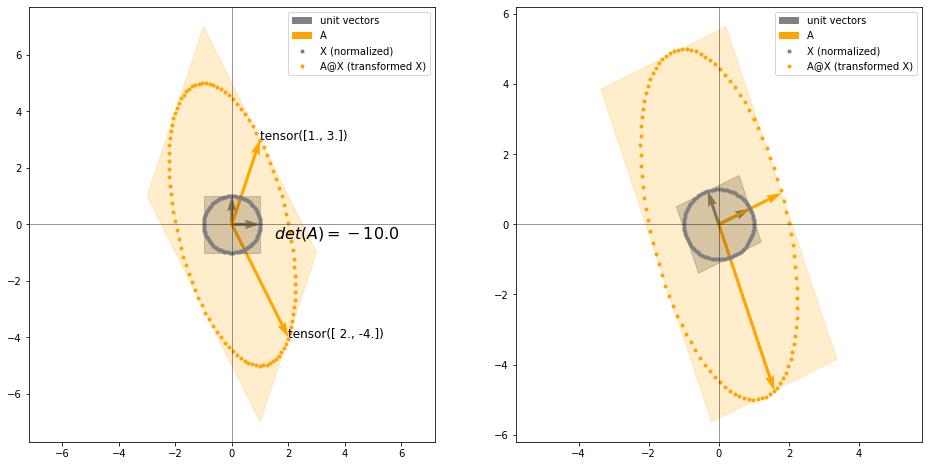

In [2]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

A = torch.FloatTensor([[1,  2],
                       [3, -4]])

X = torch.stack([torch.linspace(0, torch.pi*2, 100).cos(),
                 torch.linspace(0, torch.pi*2, 100).sin()], dim=0)

fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].quiver([0,0], [0,0], [1,0], [0,1], angles='xy', scale_units='xy', scale=1, color='grey', label='unit vectors')
axes[0].quiver([0,0], [0,0], A[0], A[1], angles='xy', scale_units='xy', scale=1, color='orange', label='A')
axes[0].add_patch(Polygon([[-1,-1], [1,-1], [1,1], [-1,1]], closed=True, color='black', alpha=.2))
axes[0].add_patch(Polygon([tuple(-A[:,0]-A[:,1]), tuple(A[:,0]-A[:,1]), tuple(A[:,0]+A[:,1]), tuple(-A[:,0]+A[:,1])], closed=True, color='orange', alpha=.2))
axes[0].text(*A.sum(dim=1)/2, rf'$det(A)={A.det()}$', fontsize=16)
axes[0].text(*A[:,0], A[:,0], fontsize=12)
axes[0].text(*A[:,1], A[:,1], fontsize=12)

axes[0].scatter(*X,   label='X (normalized)', color='grey', marker='.')
axes[0].scatter(*A@X, label='A@X (transformed X)', color='orange', marker='.')
axes[0].axvline(0, lw=1, c='k', alpha=.4)
axes[0].axhline(0, lw=1, c='k', alpha=.4)
axes[0].axis('equal')
axes[0].legend()

eigenvalues, eigenvectors = torch.linalg.eig(A)

eigenvalues = torch.view_as_real(eigenvalues)[:,0]
eigenvectors = torch.view_as_real(eigenvectors)[:,:,0]
lamda1, lambda2 = eigenvalues
v1, v2 = eigenvectors.T

axes[1].quiver([0,0], [0,0], *eigenvectors.tolist(), angles='xy', scale_units='xy', scale=1, color='grey', label='unit vectors')
axes[1].quiver([0,0], [0,0], *(eigenvectors*eigenvalues).tolist(), angles='xy', scale_units='xy', scale=1, color='orange', label='A')
axes[1].add_patch(Polygon([(-v1-v2).tolist(), (-v1+v2).tolist(), (v1+v2).tolist(), (v1-v2).tolist()], closed=True, color='black', alpha=.2))
axes[1].add_patch(Polygon([(-lamda1*v1-lambda2*v2).tolist(), (-lamda1*v1+lambda2*v2).tolist(), (lamda1*v1+lambda2*v2).tolist(), (lamda1*v1-lambda2*v2).tolist()], closed=True, color='orange', alpha=.2))

axes[1].scatter(*X,   label='X (normalized)', color='grey', marker='.')
axes[1].scatter(*A@X, label='A@X (transformed X)', color='orange', marker='.')
axes[1].axvline(0, lw=1, c='k', alpha=.4)
axes[1].axhline(0, lw=1, c='k', alpha=.4)
axes[1].axis('equal')
axes[1].legend()

plt.show()

In [ ]:
A